# Jupyter and MongoDB Test with Docker Compose 

In [10]:
#Import modules
import json
import random
import pprint
import numpy as np
import matplotlib

#Function to connect to MongoDB Containter
def get_db():
    from pymongo import MongoClient
    client = MongoClient('datascience_db_1:27017')
    db = client.testDB
    return db

#Function to add cracks to MongoDB
def add_crack(db):
    for i in range (1, 10000):
        crack = {}
        crack['crack'] = "crack" + str(i)
        crack['width'] = round(random.random(),2)
        db.cracks.insert_one(crack)

#Function to return cracks in MongoDB
def get_cracks(db):
    return db.cracks.find()

#Initialize DB
db = get_db()
print(db)

Database(MongoClient(host=['datascience_db_1:27017'], document_class=dict, tz_aware=False, connect=True), 'testDB')


In [4]:
add_crack(db)

Iterate through all the cracks in the DB

In [5]:
# Print all cracks 
#for i in get_cracks(db):
    #print(i)

Count number of cracks in the database

In [6]:
db.cracks.count()

9999

# Invoke the MongoDB Aggregation Framework

In [7]:
# Pipeline to compute avergage, max and min width of cracks
pipeline = [{ 
    "$group": { 
        "_id": "null", 
        "min_width": {
            "$min": "$width" 
        },
        "avg_width": {
            "$avg": "$width" 
        },
        "max_width": {
            "$max": "$width" 
        }
    }
}]

pprint.pprint(list((db.cracks.aggregate(pipeline))))

[{'_id': 'null',
  'avg_width': 0.5005190519051905,
  'max_width': 1.0,
  'min_width': 0.0}]


# Import MongoDB data into a DataFrame

In [8]:
import pandas as pd

cursor = db.cracks.find()
df =  pd.DataFrame(list(cursor))
df.describe()

,width
count,9999.000000
mean,0.500519
std,0.289483
min,0.000000
25%,0.250000
50%,0.500000
75%,0.750000
max,1.000000


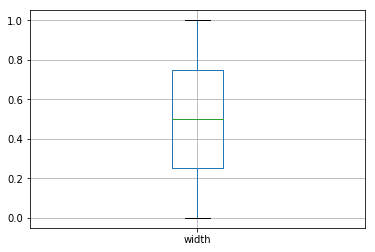

In [12]:
#df.sort_values(by='width')
#df['width'].head()
#df[0:3]
#df[df.width > 0.9]
#df.mean()
#matplotlib.style.use('ggplot')
df.boxplot()

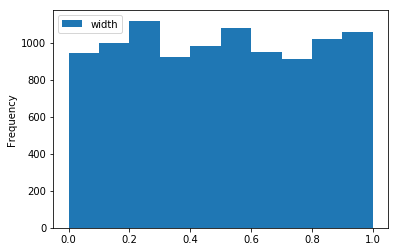

In [13]:
df.plot.hist()

## Drop the database

In [ ]:
db.cracks.drop()